In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import ipywidgets as widgets
from ipywidgets import interactive, interact, fixed, interact_manual
from IPython.display import display, clear_output

### Reading in the data files

In [2]:
data = pd.read_csv('data/higgs_data.csv')

higgs_85 = pd.read_csv('data/higgs_higgs_85.csv')
higgs_90 = pd.read_csv('data/higgs_higgs_90.csv')
higgs_95 = pd.read_csv('data/higgs_higgs_95.csv')
eeqq = pd.read_csv('data/higgs_eeqq.csv')
qq = pd.read_csv('data/higgs_qq.csv')
wen = pd.read_csv('data/higgs_wen.csv')
ww = pd.read_csv('data/higgs_ww.csv')
zee = pd.read_csv('data/higgs_zee.csv')
zz = pd.read_csv('data/higgs_zz.csv')


framesMcNoHiggs = [qq, ww, zz, zee, wen, eeqq]
framesMcNoHiggsNames = ['qq', 'ww', 'zz', 'zee', 'wen', 'eeqq']
framesListMc = framesMcNoHiggs + [higgs_85, higgs_90, higgs_95]
framesListMcNames = framesMcNoHiggsNames + ['higgs_85', 'higgs_90', 'higgs_95']

### Associate weights with the MC generated data

In [3]:
crossSectionsMc = [102., 16.5, 0.975, 3.35, 2.9, 15600., 0.094, 0.0667, 0.0333]
NumberEntriesMc = [len(frame['encm']) for frame in framesListMc]
NumberMc = [200000., 294500, 196000, 29500, 81786, 5940000, 3972, 3973, 3971]
Lum = 176.773

weights = Lum*np.array(crossSectionsMc) / np.array(NumberMc) 

for i, frame in enumerate(framesListMc):
    frame["weight"] = weights[i]
data["weight"] = 1

Ndata = len(data['encm'])

In [4]:
sum(np.array(NumberEntriesMc[:6])*weights[:6])

659.45883336774511

In [5]:
np.array(NumberEntriesMc)*weights

array([ 273.07716267,  261.38874283,   31.6321755 ,    4.65721951,
         49.24208538,   39.46144747,   14.02710667,   10.08135129,
          4.95708707])

In [6]:
sum(data['encm'])/len(data['encm'])

188.64189391575664

In [7]:
sum([sum(frame['encm']) for frame in framesListMc])/sum(NumberEntriesMc)

188.98910197226905

### Widget that decides which higgs we want to take into account

In [8]:
l = len(framesMcNoHiggs)

higgsDict = {
    'No higgs': 0, #[[],[],[]],
    '85 GeV': l, #[[higgs_85], ['higgs_85'], [weights[len(framesMcNoHiggs)-1]]],
    '90 GeV': l+1, #[[higgs_90], ['higgs_90'], [weights[len(framesMcNoHiggs)]]],
    '95 GeV': l+2, #[[higgs_95], ['higgs_95'], [weights[len(framesMcNoHiggs)+1]]]
    }

widHiggs = widgets.Dropdown(
    options=higgsDict,
    description='higgs mass:',
)

#frames = framesMcNoHiggs+[]
#names = framesMcNoHiggsNames+[]
#frameWeights = weights[:len(framesMcNoHiggs)]

def createFrames(index):
    global frames, names, NMc
    if index > 0:
        frames = framesMcNoHiggs + [framesListMc[index]]
        names = framesMcNoHiggsNames + [framesListMcNames[index]]
    else:
        frames = framesMcNoHiggs
        names = framesMcNoHiggsNames
    NMc = sum([len(frame['encm'])*frame['weight'][0] for frame in frames])
    return None

dataFrameObject = interactive(createFrames, index=widHiggs)

### Build the histogram

In [14]:
def buildHist (var,Nbins):
    plt.figure(figsize=(10,8))
    bins = plt.hist([frame[var] for frame in frames], weights=[frame["weight"] for frame in frames], 
                    bins=Nbins, stacked=True, alpha=0.5, label=names)[-2]
    dataCounts, dataBins = np.histogram(data[var], bins)
    datayErr = np.sqrt(dataCounts)
    plt.errorbar((dataBins[1:]+dataBins[:-1])/2., dataCounts, yerr =datayErr, label='data', ecolor='red',marker='s', linestyle='')
    plt.legend()
    plt.xlabel('counts')
    plt.ylabel('%s' %var)
    plt.title('%i data points and %.1f Mc (weighted) points' %(Ndata,NMc))
    plt.show()

## Show Widgets

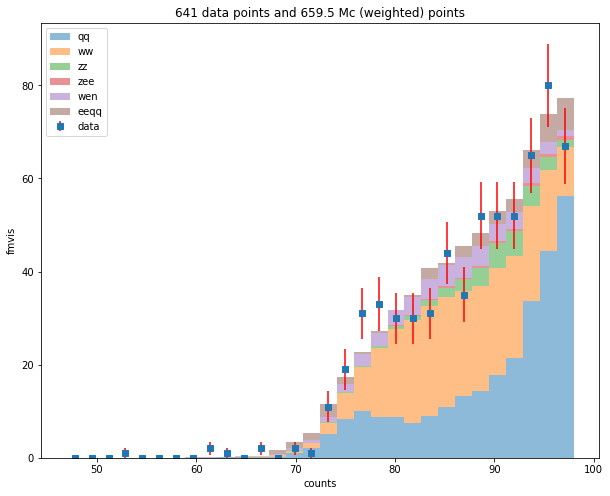

In [15]:
display(dataFrameObject)
interact_manual(buildHist,var=dict(zip(data.columns.values,data.columns.values)),Nbins=(10,50), alpha=.2)

# Try stuff

In [13]:

"""columnsDict = {}
for i,frame in enumerate(framesList):
    columnsDict[framesNamesList[i]] = frame.columns
#pd.DataFrame.from_dict(columnsDict, orient='columns')

#data['encm']"""

"columnsDict = {}\nfor i,frame in enumerate(framesList):\n    columnsDict[framesNamesList[i]] = frame.columns\n#pd.DataFrame.from_dict(columnsDict, orient='columns')\n\n#data['encm']"